# Лабораторная работа №8
Численное интегрирование
Вариант 9

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def f(x):
    return x * math.exp(-x)

In [3]:
a, b = -1, math.pi

# Задание 1
Нарисовать графики подынтегральной функции и границы интегрирования

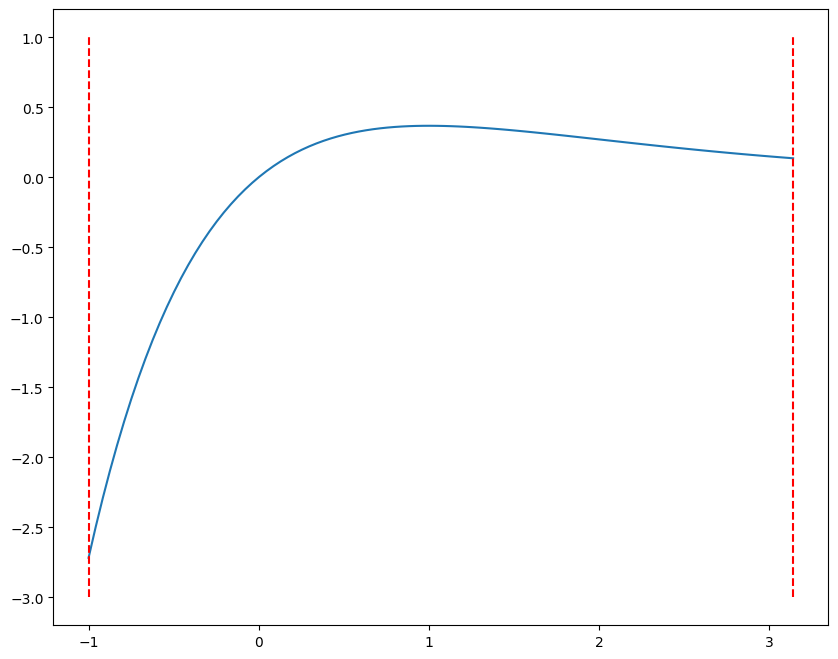

In [4]:
fig = plt.figure(figsize=(10, 8))
X = np.linspace(a, b, 100)
Y = np.array([f(x) for x in X], dtype=np.float64)
plt.plot(X, Y)
plt.vlines([a, b], ymin=-3, ymax=1, colors="red", linestyles="dashed")
plt.show()

# Задание 2
Вычислить заданные интегралы с точностью 𝜖=1e−5 и 𝜖=1e−7, используя правило Рунге, по формулам трапеций и Симпсона

In [5]:
def trapezoidal(f, a=-1, b=1, eps=1e-5, max_sub_iters=10):
    """
    f: callable - функция, которую нужно интегрировать
    a - левая граница интегрирования
    b - правая граница интегрирования
    eps - точность интегрирования
    max_sub_iters - максимальное кол-во уменьшений i-ого отрезка в 2 раза
    """
    def get_int(f, a, b, n=2):
        I = 0
        h = (b - a) / n
        X = np.linspace(a, b, n + 1)
        for i in range(1, n + 1):
            I += h * (f(X[i - 1]) + f(X[i])) / 2
        return I

    I = 0
    parts = 0
    X = np.linspace(a, b, 10)
    for i in range(1, len(X)):
        iter = 0
        n = 2
        while iter < max_sub_iters:
            Ih = get_int(f, X[i - 1], X[i], n)
            Ih2 = get_int(f, X[i - 1], X[i], 2 * n)
            if abs(Ih - Ih2) <= eps * 7 * (X[i] - X[i - 1]) / 2 ** iter / (b - a):
                I += Ih2
                parts += 2 * n
                break
            iter += 1
            n *= 2
    return I, parts

In [6]:
def simpson(f, a=-1, b=1, eps=1e-5, max_sub_iters=10):
    """
    f: callable - функция, которую нужно интегрировать
    a - левая граница интегрирования
    b - правая граница интегрирования
    eps - точность интегрирования
    max_sub_iters - максимальное кол-во уменьшений i-ого отрезка в 2 раза
    """
    def get_int(f, a, b, n):
        I = 0
        h = (b - a) / n
        X = np.linspace(a, b, n + 1)
        for i in range(1, n + 1):
            I += h * (f(X[i - 1]) + 4 * f(X[i - 1] + h/2) + f(X[i])) / 6
        return I

    parts = 0
    I = 0
    X = np.linspace(a, b, 10)
    for i in range(1, len(X)):
        iter = 0
        n = 2
        while iter < max_sub_iters:
            Ih = get_int(f, X[i - 1], X[i], n)
            Ih2 = get_int(f, X[i - 1], X[i], 2 * n)
            if abs(Ih - Ih2) <= eps * 31 * (X[i] - X[i - 1]) / 2 ** iter / (b - a):
                I += Ih2
                parts += 2 * n
                break
            iter += 1
            n *= 2
    return I, parts

In [7]:
t, pt = trapezoidal(f, -1, math.pi, 1e-5, 30)
s, ps = simpson(f, -1, math.pi, 1e-5, 30)
print(t, pt, s, ps)

-0.17897594114468138 16100 -0.17897510773258196 36


In [8]:
t, pt = trapezoidal(f, -1, math.pi, 1e-7, 50)
s, ps = simpson(f, -1, math.pi, 1e-7, 50)
print(t, pt, s, ps)

-0.17897444649333238 1040896 -0.1789744973695485 64


# Задание 3
Вычислить интегралы с помощью квадратурных формул Гаусса при m=2,4,5,8

Воспользуемся существующими значениями коэффициентов и узлов для квадратурную формул Гаусса
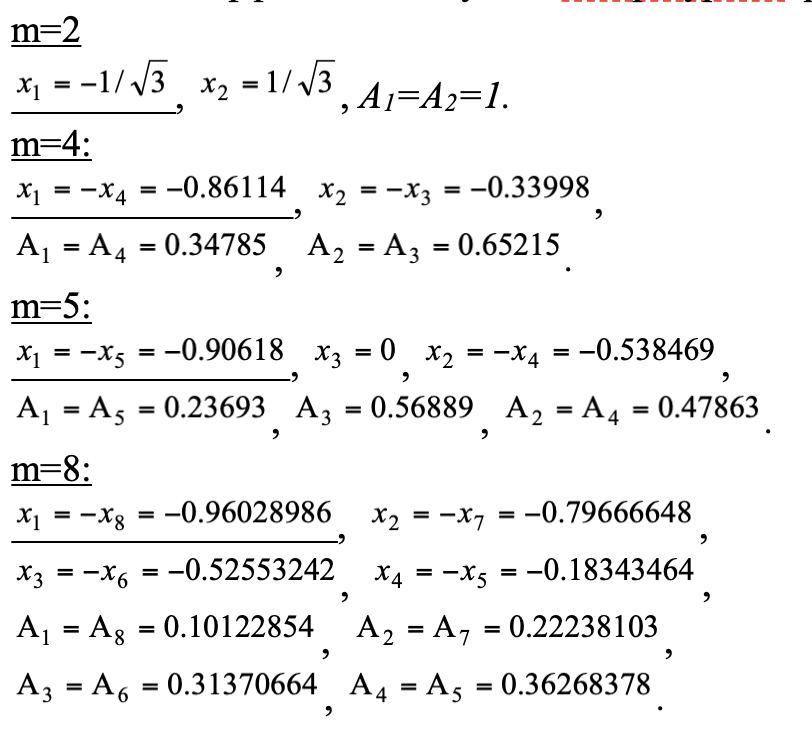

$$\int_{-1}^{1}f(x)dx \simeq \sum_{i=1}^{m}A_if(x_i)$$
В нашем случае, отрезок интегрирования [-1, pi]
Воспльзуемся заменой $$t=\frac{a+b}{2}+\frac{(b-a)x}{2}$$
Тогда $$t_i=\frac{(a+b)}{2}+\frac{(b-a)x_i}{2}$$

In [9]:
params = {
    2: {
        "x": [-1/(3**0.5), 1/(3**0.5)],
        "A": [1, 1]
    },
    4: {
        "x": [-0.86114, -0.33998, 0.33998, 0.86114],
        "A": [0.34785, 0.65215, 0.65215, 0.34785]
    },
    5: {
        "x": [-0.90618, -0.53846, 0, 0.53846, 0.90618],
        "A": [0.23693, 0.47863, 0.56889, 0.47863, 0.23693]
    },
    8: {
        "x": [
            -0.96028986, -0.79666648, -0.52553242, -0.18343464,
            0.18343464, 0.52553242, 0.79666648, 0.96028986
        ],
        "A": [
            0.10122854, 0.22238103, 0.31370664, 0.36268378, 0.36268378,
            0.31370664, 0.22238103, 0.10122854
        ]
    }
}


In [10]:
def gauss(f, m, a, b):
    """
    f: callable - функция, которую нужно интегрировать
    m - порядок алгебраической точности
    a - левая граница интегрирования
    b - правая граница интегрирования
    """
    x = params[m]["x"]
    if not (a == -1 and b == 1):
        x = [((a + b)/2 + xi*(b - a)/2) for xi in x]
    A = params[m]["A"]

    return (b - a) * sum([A[i] * f(x[i]) for i in range(m)]) / 2

In [11]:
print(f"При m=2 I={gauss(f=f, m=2, a=-1, b=math.pi)}")
print(f"При m=4 I={gauss(f=f, m=4, a=-1, b=math.pi)}")
print(f"При m=5 I={gauss(f=f, m=5, a=-1, b=math.pi)}")
print(f"При m=8 I={gauss(f=f, m=8, a=-1, b=math.pi)}")

При m=2 I=0.19389637354352404
При m=4 I=-0.17842597749562059
При m=5 I=-0.1789526638933743
При m=8 I=-0.17897449222814546


При m=8 погрешность результата близка к 1e-7

# Задание 4
Построить кубаторную формулу трапеций, используя правило повторонго интегрирования


$$I=\int\int{f(x,y)dxdy}, G=\left\{ (x,y)| x\in [a,b], y\in[c,d] \right\}$$
$$I=\int_{a}^{b}{dx}\int_{c}^{d}{f(x,y)dy}=\int_{a}^{b}{F(x)dx}, F(x)=\int_{c}^{d}{f(x,y)dy}$$
$$F(x)=\int_{c}^{d}{f(x,y)}=(d-c)\frac{f(x,c)+f(x,d)}{2}+R$$
$$I=\int_{a}^{b}{F(x)}=(b-a)\frac{F(a)+F(b)}{2}=\frac{(b-a)(d-c)}{4}(f(a,c)+f(a,d)+f(b,c)+f(b,d)) + R$$